# Dataset Exploration, Balancing, and Cleaning

Download the datasets from Kaggle. Create directories on the Google VM Linux Servers, unzip the data and store it in the respective directories.

In [0]:
import json, zipfile, os
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from google.colab import files

In [0]:
api_token = ... #REDACTED

!mkdir ~/.kaggle
!cd ~/.kaggle
!touch kaggle.json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!mkdir data1
!mkdir data2
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge -p data1
!kaggle competitions download -c jigsaw-unintended-bias-in-toxicity-classification -p data2

os.chdir('data1')
for file in os.listdir():
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall()
    zip_ref.close()

os.chdir('../data2')
for file in os.listdir():
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall()
    zip_ref.close()

  0% 0.00/1.39M [00:00<?, ?B/s]
100% 1.39M/1.39M [00:00<00:00, 93.9MB/s]
 85% 20.0M/23.4M [00:00<00:00, 37.5MB/s]
100% 23.4M/23.4M [00:00<00:00, 78.1MB/s]
 76% 20.0M/26.3M [00:00<00:00, 48.6MB/s]
100% 26.3M/26.3M [00:00<00:00, 104MB/s] 
  0% 0.00/1.46M [00:00<?, ?B/s]
100% 1.46M/1.46M [00:00<00:00, 98.6MB/s]
 71% 9.00M/12.7M [00:00<00:00, 25.7MB/s]
100% 12.7M/12.7M [00:00<00:00, 28.6MB/s]
  0% 0.00/224k [00:00<?, ?B/s]
100% 224k/224k [00:00<00:00, 69.2MB/s]
 42% 5.00M/12.0M [00:00<00:00, 24.7MB/s]
100% 12.0M/12.0M [00:00<00:00, 47.0MB/s]
 32% 5.00M/15.6M [00:00<00:00, 26.2MB/s]
100% 15.6M/15.6M [00:00<00:00, 51.9MB/s]
 32% 5.00M/15.7M [00:00<00:00, 22.0MB/s]
100% 15.7M/15.7M [00:00<00:00, 52.3MB/s]
 62% 41.0M/66.6M [00:00<00:00, 35.7MB/s]
100% 66.6M/66.6M [00:00<00:00, 76.2MB/s]
 96% 263M/273M [00:02<00:00, 118MB/s]
100% 273M/273M [00:02<00:00, 105MB/s]


## Dataset 1

Load the train and test sets for the first dataset. Merge the test set labels with the test set comments, while removing the comments and labels for which the label is -1 (comments labeled -1 were not used in the Kaggle competition). The dataset has 7 different classes: non-toxic, toxic, severe toxic, insult, threat, obscene, and identity hate.

In [0]:
os.chdir('../data1')
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

test_data_labels = pd.read_csv("test_labels.csv")
test_data_labels = test_data_labels[test_data_labels.toxic != -1]
test_data = test_data.iloc[list(test_data_labels.index)]
test_data = test_data.merge(test_data_labels)

Plot the distribution of each class.

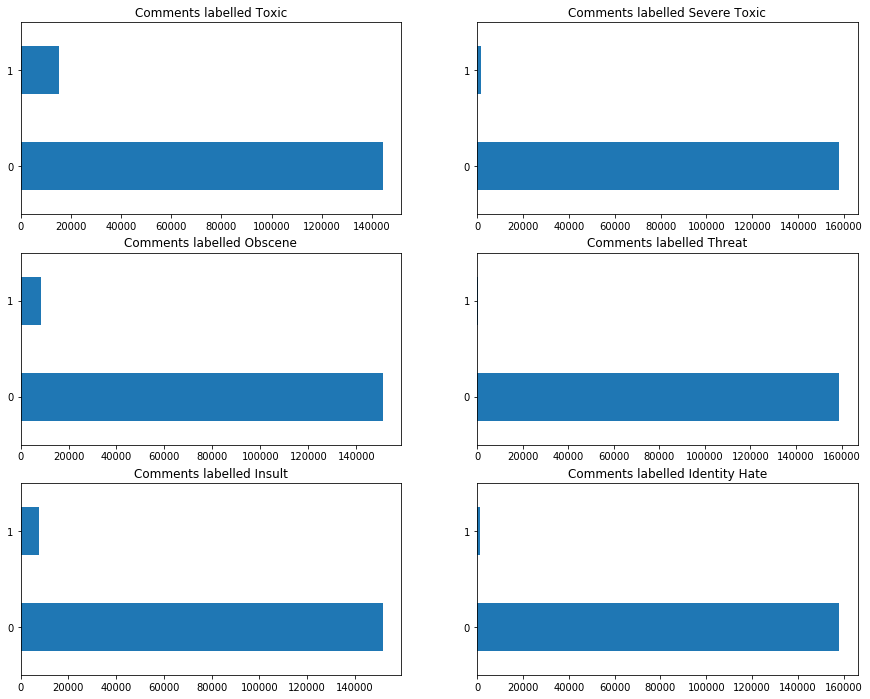

Statistics
Toxic
0    144277
1     15294
Name: toxic, dtype: int64
0    0.904156
1    0.095844
Name: toxic, dtype: float64

Severe Toxic
0    157976
1      1595
Name: severe_toxic, dtype: int64
0    0.990004
1    0.009996
Name: severe_toxic, dtype: float64

Obscene
0    151122
1      8449
Name: obscene, dtype: int64
0    0.947052
1    0.052948
Name: obscene, dtype: float64

Threat
0    159093
1       478
Name: threat, dtype: int64
0    0.997004
1    0.002996
Name: threat, dtype: float64

Insult
0    151694
1      7877
Name: insult, dtype: int64
0    0.950636
1    0.049364
Name: insult, dtype: float64

Identity Hate
0    158166
1      1405
Name: identity_hate, dtype: int64
0    0.991195
1    0.008805
Name: identity_hate, dtype: float64



In [0]:
toxic_counts = train_data["toxic"].value_counts()
severe_toxic_counts = train_data["severe_toxic"].value_counts()
obscene_counts = train_data["obscene"].value_counts()
threat_counts = train_data["threat"].value_counts()
insult_counts = train_data["insult"].value_counts()
identity_hate_counts = train_data["identity_hate"].value_counts()

plt.figure(figsize=(15, 12))
plt.subplot(3, 2, 1)
toxic_counts.plot(kind="barh", title="Comments labelled Toxic")

plt.subplot(3, 2, 2)
severe_toxic_counts.plot(kind="barh", title="Comments labelled Severe Toxic")

plt.subplot(3, 2, 3)
obscene_counts.plot(kind="barh", title="Comments labelled Obscene")

plt.subplot(3, 2, 4)
threat_counts.plot(kind="barh", title="Comments labelled Threat")

plt.subplot(3, 2, 5)
insult_counts.plot(kind="barh", title="Comments labelled Insult")

plt.subplot(3, 2, 6)
identity_hate_counts.plot(kind="barh", title="Comments labelled Identity Hate")

plt.show()

print("Statistics")
print("Toxic")
print(toxic_counts)
print(toxic_counts/train_data.shape[0])
print()

print("Severe Toxic")
print(severe_toxic_counts)
print(severe_toxic_counts/train_data.shape[0])
print()

print("Obscene")
print(obscene_counts)
print(obscene_counts/train_data.shape[0])
print()

print("Threat")
print(threat_counts)
print(threat_counts/train_data.shape[0])
print()

print("Insult")
print(insult_counts)
print(insult_counts/train_data.shape[0])
print()

print("Identity Hate")
print(identity_hate_counts)
print(identity_hate_counts/train_data.shape[0])
print()

It is clear that this data set is not balanced and slightly biased towards safe comments, this is expected as unsafe comments are typically the exception rather than the norm. It will also be interesting to look at the comments as a whole (safe vs unsafe). 

Categorize all comments that have a 0 label in each toxicity class as safe; mark all comments that have a 1 label in any of the toxicity classea as unsafe. Shuffle the sets. Add a new label called "unsafe" which is 0 if the comment is safe, and 1 if the comment is unsafe.

In [0]:
def filter(dataset):
  safe = dataset[(dataset['toxic']==0) & (dataset['severe_toxic']==0) & (dataset['obscene']==0) & (dataset['threat']==0) & (dataset['insult']==0) & (dataset['identity_hate']==0)]
  unsafe = dataset[(dataset['toxic']==1) | (dataset['severe_toxic']==1) | (dataset['obscene']==1) | (dataset['threat']==1) | (dataset['insult']==1) | (dataset['identity_hate']==1)]
  return (safe,unsafe)

train_data_safe, train_data_unsafe = filter(train_data)
test_data_safe, test_data_unsafe = filter(test_data)

In [0]:
train_data_safe = train_data_safe.drop(["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"], axis = 1)
train_data_unsafe = train_data_unsafe.drop(["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"], axis = 1)
test_data_safe = test_data_safe.drop(["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"], axis = 1)
test_data_unsafe = test_data_unsafe.drop(["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"], axis = 1)

In [0]:
train_data_safe["unsafe"] = 0
train_data_unsafe["unsafe"] = 1
test_data_safe["unsafe"] = 0
test_data_unsafe["unsafe"] = 1

In [0]:
train_data = train_data_safe.append(train_data_unsafe)
test_data = test_data_safe.append(test_data_unsafe)

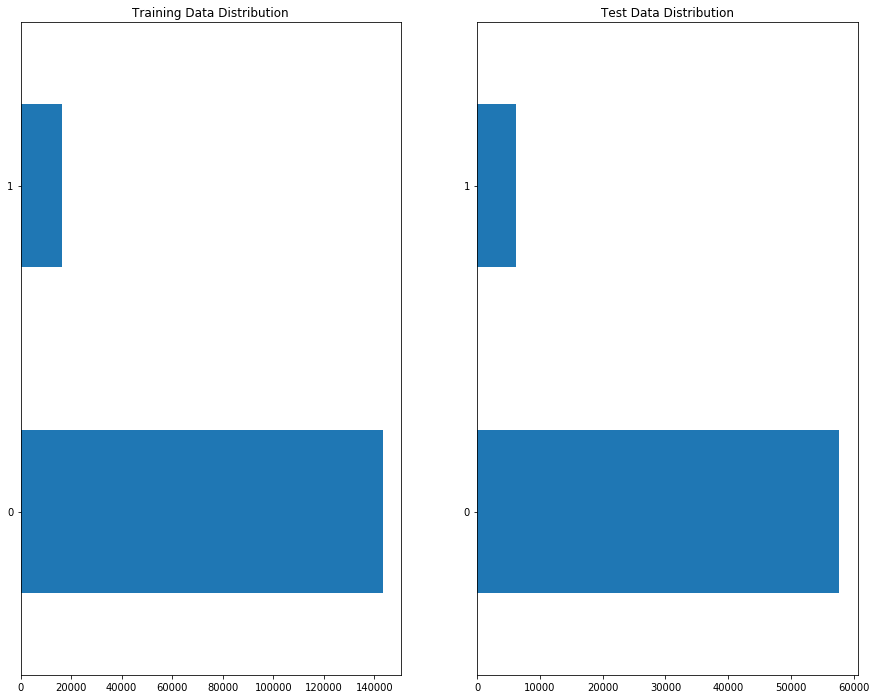

Statistics
Training Data
0    143346
1     16225
Name: unsafe, dtype: int64
0    0.898321
1    0.101679
Name: unsafe, dtype: float64

Test Data
0    57735
1     6243
Name: unsafe, dtype: int64
0    0.90242
1    0.09758
Name: unsafe, dtype: float64



In [0]:
train_counts = train_data["unsafe"].value_counts()
test_counts = test_data["unsafe"].value_counts()


plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
train_counts.plot(kind="barh", title="Training Data Distribution")

plt.subplot(1, 2, 2)
test_counts.plot(kind="barh", title="Test Data Distribution")

plt.show()

print("Statistics")
print("Training Data")
print(train_counts)
print(train_counts/train_data.shape[0])
print()

print("Test Data")
print(test_counts)
print(test_counts/test_data.shape[0])
print()

Clearly, the sets are imbalanced, and heavily skewed towards the safe set, which will bias the models we wish to train. Thus, we need to undersample the safe set to match the unsafe set. 

In [0]:
train_data_safe_sampled = train_data_safe.sample(n=train_data_unsafe.shape[0], random_state=123)
test_data_safe_sampled = test_data_safe.sample(n=test_data_unsafe.shape[0], random_state=123)

In [0]:
train_data = train_data_safe_sampled.append(train_data_unsafe)
test_data = test_data_safe_sampled.append(test_data_unsafe)

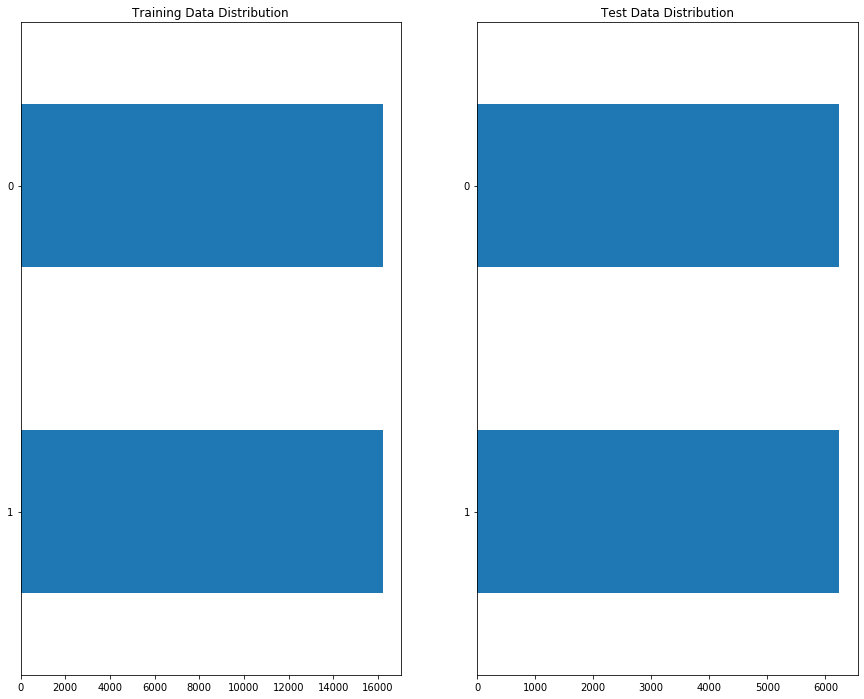

Statistics
Training Data
1    16225
0    16225
Name: unsafe, dtype: int64
1    0.5
0    0.5
Name: unsafe, dtype: float64

Test Data
1    6243
0    6243
Name: unsafe, dtype: int64
1    0.5
0    0.5
Name: unsafe, dtype: float64



In [0]:
train_counts = train_data["unsafe"].value_counts()
test_counts = test_data["unsafe"].value_counts()


plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
train_counts.plot(kind="barh", title="Training Data Distribution")

plt.subplot(1, 2, 2)
test_counts.plot(kind="barh", title="Test Data Distribution")

plt.show()

print("Statistics")
print("Training Data")
print(train_counts)
print(train_counts/train_data.shape[0])
print()

print("Test Data")
print(test_counts)
print(test_counts/test_data.shape[0])
print()

Now the set is properly balanced, with an even split between the two classes. We'll need to merge the filtered datasets into one set, we will do this then randomly shuffle the dataset. This will result in one combined set for the first dataset.

In [0]:
data1 = train_data.append(test_data).sample(frac=1, random_state=123)

## Dataset 2

Load the train and test sets for the second dataset. Merge the test set labels with the test set comments. This dataset has both public and private test sets.

This dataset already contains a "toxicity" column that is similar to the "unsafe" column we added in the first dataset. However, it differs in that it is a decimal value, somewhere between 0 and 1. Thus, we apply a threshold of 0.5 to classify it as either 0 or 1. 

In [0]:
os.chdir('../data2')

train_data = pd.read_csv("train.csv")
test_data_public = pd.read_csv("test_public_expanded.csv")
test_data_private = pd.read_csv("test_private_expanded.csv")

train_data = train_data[["id", "target" ,"comment_text"]]

test_data_public = test_data_public[["id", "toxicity" ,"comment_text"]]

test_data_private = test_data_private[["id", "toxicity" ,"comment_text"]]

In [0]:
train_data_safe = train_data[train_data["target"] < 0.5]
train_data_unsafe = train_data[train_data["target"] >= 0.5]

test_data_public_safe = test_data_public[test_data_public["toxicity"] < 0.5]
test_data_public_unsafe = test_data_public[test_data_public["toxicity"] >= 0.5]

test_data_private_safe = test_data_private[test_data_private["toxicity"] < 0.5]
test_data_private_unsafe = test_data_private[test_data_private["toxicity"] >= 0.5]

In [0]:
train_data_safe = train_data_safe.drop(["target"], axis = 1)
train_data_unsafe = train_data_unsafe.drop(["target"], axis = 1)

test_data_public_safe = test_data_public_safe.drop(["toxicity"], axis = 1)
test_data_public_unsafe = test_data_public_unsafe.drop(["toxicity"], axis = 1)

test_data_private_safe = test_data_private_safe.drop(["toxicity"], axis = 1)
test_data_private_unsafe = test_data_private_unsafe.drop(["toxicity"], axis = 1)

In [0]:
train_data_safe["unsafe"] = 0
train_data_unsafe["unsafe"] = 1

test_data_public_safe["unsafe"] = 0
test_data_public_unsafe["unsafe"] = 1

test_data_private_safe["unsafe"] = 0
test_data_private_unsafe["unsafe"] = 1

In [0]:
train_data = train_data_safe.append(train_data_unsafe)

test_data_public = test_data_public_safe.append(test_data_public_unsafe)

test_data_private = test_data_private_safe.append(test_data_private_unsafe)

test_data = test_data_public.append(test_data_private)

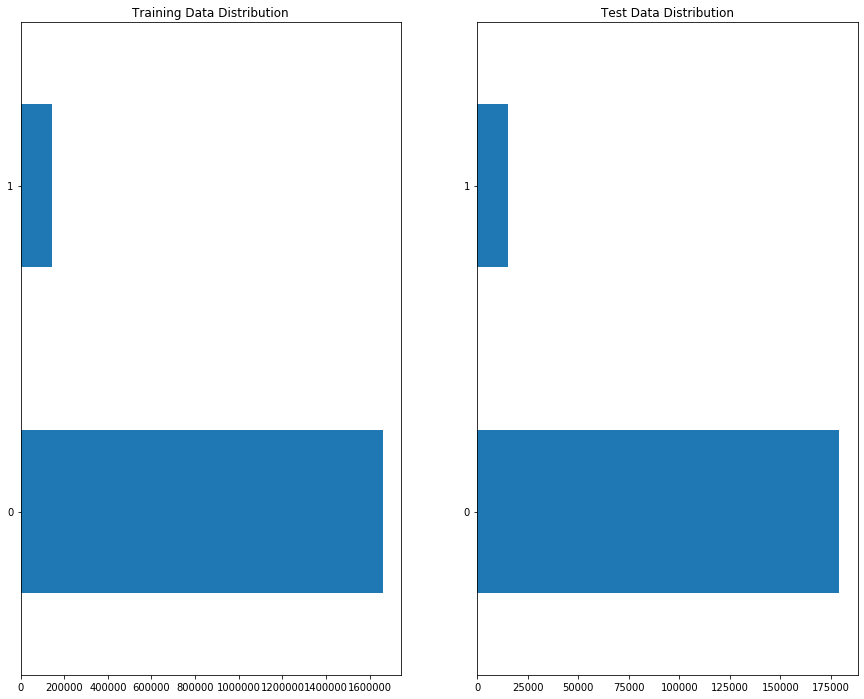

Statistics
Training Data
0    1660540
1     144334
Name: unsafe, dtype: int64
0    0.920031
1    0.079969
Name: unsafe, dtype: float64

Test Data
0    179192
1     15448
Name: unsafe, dtype: int64
0    0.920633
1    0.079367
Name: unsafe, dtype: float64



In [0]:
train_counts = train_data["unsafe"].value_counts()
test_counts = test_data["unsafe"].value_counts()


plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
train_counts.plot(kind="barh", title="Training Data Distribution")

plt.subplot(1, 2, 2)
test_counts.plot(kind="barh", title="Test Data Distribution")

plt.show()

print("Statistics")
print("Training Data")
print(train_counts)
print(train_counts/train_data.shape[0])
print()

print("Test Data")
print(test_counts)
print(test_counts/test_data.shape[0])
print()

This second dataset is also highly imbalanced, and heavily skewed towards the safe class. Thus, we need to undersample this dataset as well.

In [0]:
train_data_safe_sampled = train_data_safe.sample(n=train_data_unsafe.shape[0], random_state=123)
test_data_public_safe_sampled = test_data_public_safe.sample(n=test_data_public_unsafe.shape[0], random_state=123)
test_data_private_safe_sampled = test_data_private_safe.sample(n=test_data_private_unsafe.shape[0], random_state=123)

In [0]:
train_data = train_data_safe_sampled.append(train_data_unsafe)
test_data_public = test_data_public_safe_sampled.append(test_data_public_unsafe)
test_data_private = test_data_private_safe_sampled.append(test_data_private_unsafe)
test_data = test_data_public.append(test_data_private)

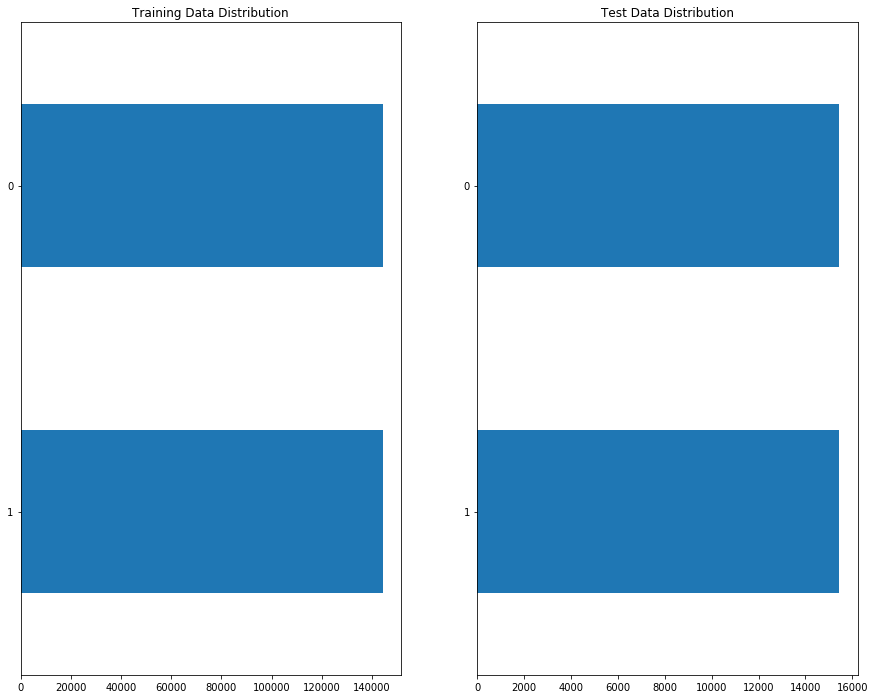

Statistics
Training Data
1    144334
0    144334
Name: unsafe, dtype: int64
1    0.5
0    0.5
Name: unsafe, dtype: float64

Test Data
1    15448
0    15448
Name: unsafe, dtype: int64
1    0.5
0    0.5
Name: unsafe, dtype: float64



In [0]:
train_counts = train_data["unsafe"].value_counts()
test_counts = test_data["unsafe"].value_counts()


plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
train_counts.plot(kind="barh", title="Training Data Distribution")

plt.subplot(1, 2, 2)
test_counts.plot(kind="barh", title="Test Data Distribution")

plt.show()

print("Statistics")
print("Training Data")
print(train_counts)
print(train_counts/train_data.shape[0])
print()

print("Test Data")
print(test_counts)
print(test_counts/test_data.shape[0])
print()

Now the second dataset is perfectly balanced. Next, we merge the train and test sets together. And then combine the resulting dataset with the combined first dataset. 

In [0]:
data2 = train_data.append(test_data).sample(frac=1, random_state=123)
data = data1.append(data2).sample(frac=1, random_state=123)

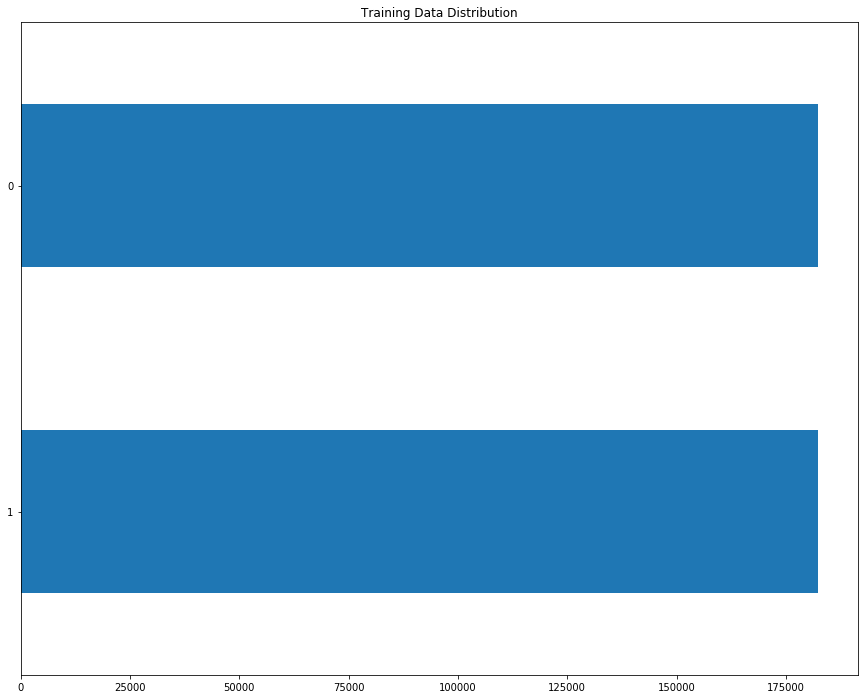

Statistics
Training Data
1    182250
0    182250
Name: unsafe, dtype: int64
1    0.5
0    0.5
Name: unsafe, dtype: float64



In [0]:
data_counts = data["unsafe"].value_counts()


plt.figure(figsize=(15, 12))
data_counts.plot(kind="barh", title="Training Data Distribution")

plt.show()

print("Statistics")
print("Training Data")
print(data_counts)
print(data_counts/data.shape[0])
print()

Download the results.

In [0]:
from google.colab import files
data.to_csv('data.csv') 
files.download('data.csv')